<h1 style="color: #5e9ca0;"><span style="color: #000000;">Learning the XOR function and Visualizing the Hidden Layer output.</span></h1>
<p><span style="color: #000000;">We would be using a basic feedforward network with one hidden layer to learn the&nbsp; XOR function using numpy.</span></p>
<p>The XOR truth table is given as follows:</p>


<table style="height: 190px; width: 110px;">
<tbody>
<tr>
<td style="width: 29px;">0</td>
<td style="width: 29px;">0</td>
<td style="width: 36px;"><span style="color: #ffcc00;"><strong>1</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">1</td>
<td style="width: 29px;">0</td>
<td style="width: 36px;"><span style="color: #003366;"><strong>0</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">1</td>
<td style="width: 29px;">1&nbsp;</td>
<td style="width: 36px;"><span style="color: #ffcc00;"><strong>1</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">0</td>
<td style="width: 29px;">1</td>
<td style="width: 36px;"><span style="color: #003366;"><strong>0</strong></span></td>
</tr>
</tbody>
</table>

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create the training data for XOR.

data = np.array([[0,0,1],[1,0,0],[1,1,1],[0,1,0]])
print(data)

#First two columns are the inputs,3rd Column consists of the labels

[[0 0 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]]


In [3]:
#Create the X_train(Co-oridinates) and Y_train(Labels) Matrices.

Y_train = data[:,2].reshape(data.shape[0],1)
X_train = data[:,:2]

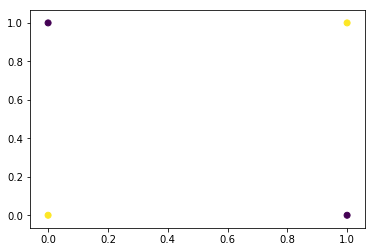

In [4]:
#Let us Visualise how the input space looks like:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

<p>In the above plot, we can clearly see that the <strong>yellow</strong> and <strong>purple</strong> points cannot be separated&nbsp;by a straight line. XOR function is not linearly separable.</p>
<p>A linear model applied <strong>directly</strong> to the original input <strong>cannot implement the XOR function.</strong></p>
<p>We should try&nbsp;to make the input to the linear model such that the <strong>points can be separated&nbsp;by a straight line.</strong>It is for this purpose do we use a <strong>hidden layer which transforms the input</strong> so that it becomes linearly separable.</p>

In [5]:
#Creating the neural network
#Network Parameters:
X = X_train.T
y = Y_train.T

n_input = 2
n_hidden = 2
n_output=1
iterations =200

m = X.shape[1]# m is the number of training samples

learning_rate = 1.5

In [12]:
#Defining non-linear function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))



In [101]:
def plot_hiddenlayer_output(X,W1):
    %matplotlib inline
    z1 = np.dot(W1,X)+b1 #Forward Propagation Step
    a1 = sigmoid(z1) #Applying Sigmoid Non linearity
    plt.scatter(a1[0,:],a1[1,:],c=y,alpha=1)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    
def plot_decision_boundry(fig,W2,b2):
    cx = W2[0,0]
    cy = W2[0,1]
    c = -b2
    fig.plot(([-1,2]),([(c/cy-cx*-1/cy).reshape(1,),(c/cy-cx*2/cy).reshape(1,)]),c='r',marker='x')
    plt.xlabel("X axis")
    plt.ylabel("Y axis")


In [102]:
#initializing weights and biases
np.random.seed(1)
W1 = np.random.normal(0,1/np.sqrt(2),size=[n_hidden,n_input])#Shape 2,2
W2 = np.random.normal(0,1/np.sqrt(2),size=[n_output,n_hidden])#Shape1,2
b1 = np.zeros((n_hidden,1))#Shape2,1
b2 = np.zeros((n_output,1))#shape1,1

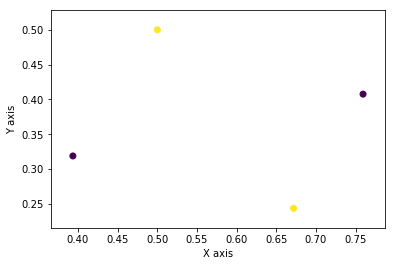

In [103]:
plot_hiddenlayer_output(X,W1)

In [104]:
W2_temp = W2

<p>The plot you see above is the what the <strong>hidden layer outputs right now</strong>.Even after applying the sigmoid transformation, the points <strong>cannot</strong> be separated by drawing a straight line.</p>
<p>Now we will train the neural network, which will <strong>change</strong> the Weights and Biases using gradient descent,<strong>in order to reduce the cost function</strong>.</p>

<IPython.core.display.Javascript object>


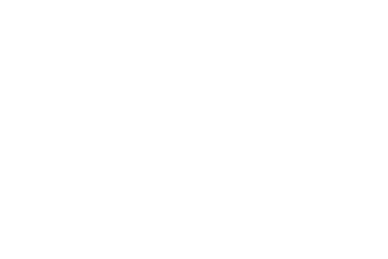

<IPython.core.display.Javascript object>


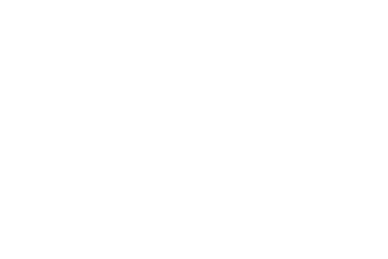

In [105]:
#Array to save cost after each iteration:
cost = []

#PLOTTING
%matplotlib notebook 
f = plt.figure()

pa1 = f.add_subplot(111)
plt.ion()

for i in range(iterations):
    
    #FORWARD PROPAGATION
    z1 = np.dot(W1,X)+b1 #Shape2,4
    a1 = sigmoid(z1) #Shape2,4
    z2 = np.dot(W2,a1)+b2 #Shape1,4
    a2 = sigmoid(z2) #Shape1,4

    #PLOTTING
        
    if (iterations<1001):
        pa1.clear()
        pa1.scatter(a1[0,:],a1[1,:],c=y,alpha=1)
        plot_decision_boundry(pa1,W2,b2)
        
        f.canvas.draw()
        f.tight_layout()
    
    
   
    
    #CALCULATE COST(MAXIMUM LIKELIHOOD COST)
    
    c = (-np.dot(y,np.log(a2).T)-np.dot(1-y,np.log(1-a2).T))/m
    cost.append(c)
    
    
    #BACK PROPAGATION
    
    dz2 = a2-y#1,4
    dW2 = np.dot(dz2,a1.T)/m #1,2
    db2 = np.sum(dz2,axis=1,keepdims=True)/m
    
    dz1 = np.multiply(np.dot(W2.T,dz2),sigmoid_prime(z1))#2,4
    dW1 = np.dot(dz1,X.T)/m #2,2
    db1 = np.sum(dz1,axis=1,keepdims=True)/m
    
   
    
        
    #GRADIENT DESCENT
    W2 = W2 - learning_rate*dW2
    W1 = W1 - learning_rate*dW1
    b2 = b2 - learning_rate*db2
    b1 = b1 -learning_rate*db1
    
    

<p>As the Weights and Biases are changed, <strong>observe how the output of the hidden layer changes</strong>.The yellow and purple points <strong>can</strong> now be separated&nbsp;by a straight line!</p>

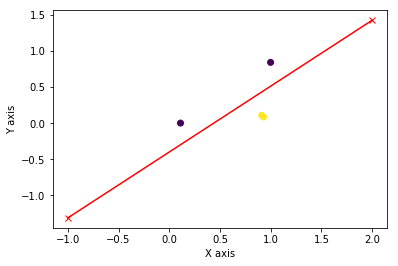

In [106]:
%matplotlib inline
z1 = np.dot(W1,X)+b1 #Forward Propagation Step
a1 = sigmoid(z1) #Applying Sigmoid Non linearity
z2 = np.dot(W2,a1)+b2 #Shape1,4


plt.scatter(a1[0,:],a1[1,:],c=y,alpha=1)
plot_decision_boundry(plt,W2,b2)

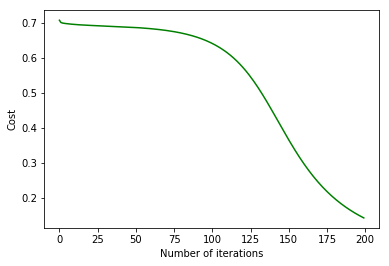

In [107]:
plt.plot(range(iterations),np.array(cost).reshape(iterations,),c='g')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")